In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#Color parameters
color_l=[
    (0,0,0),
    (230,159,0),
    (86,180,233),
    (0,158,115),
    (240,228,66),
    (0,114,178),
    (213,94,0),
    (204,121,167)
]

class myplt_per_bar():
    def __init__(self,l_area=[],tick_x_labels=[],index_l=[],da1=pd.DataFrame(),l_data=[[]],l_data_index=[]):
        self.da1=da1
        if da1.empty :
            if l_data==[[]]:
                print("data cannot be empty")
            if l_data_index==[]:
                l_data_index=[i for i in range(len(l_data))]
            if index_l==[]:
                index_l=l_data_index
            if l_area==[]:
                l_area=["area 0"]+["area "+str(i+1) for i in range(int((len(l_data)-1)/2))]
            if tick_x_labels==[]:
                tick_x_labels=[i for i in range(len(l_data))]
        else:
            if l_area==[]:
                l_area=["area 0"]+["area "+str(i+1) for i in range(int((da1.shape[0]-1)/2))]
            if tick_x_labels==[]:
                tick_x_labels=[i for i in range(da1.shape[0])]
            if index_l==[]:
                index_l=list(da1.columns)
        self.l_data=l_data
        self.l_area=l_area
        self.tick_x_labels=tick_x_labels
        self.index_l=index_l
        self.l_data_index=l_data_index
    def draw(self,ax):
        #Draw the first column
        if self.da1.empty:
            h_l=self.l_data[0]
            i_l=self.l_data_index
        else:
            h_l=list(self.da1.iloc[0])
            i_l=list(self.da1.keys())
        h_sum=sum(h_l)
        out_l=[(h_l[i]/h_sum,i_l[i]) for i in range(len(h_l))]
        Out_l2=[]
        for index in self.index_l:
            for out in out_l:
                if index==out[1]:
                    Out_l2.append(out)
                    break
        Out_l2=[(i[1],i[0]) for i in Out_l2]
        l=[]
        for i in range(len(Out_l2)):
            l.append(sum([j[1] for j in Out_l2[:i]]))
        ax.cla()
        ax.set_ylim((0,1))
        tick_y=[i/10 for i in range(0,11)]
        ax.set_yticks(tick_y)
        ax.set_yticklabels([str(int(i*100))+"%" for i in tick_y])
        ax.spines['top'].set_color('None')
        ax.spines['right'].set_color('None')
        ax.spines['left'].set_color('None')
        ax.grid()#zorder is about 2.5
        #Draw the pillars
        for i in range(len(Out_l2)):
            if i<3:
                ax.text(0.5,(l[i]+l[i+1])/2 , str(int(round(Out_l2[i][1],2)*100))+"%", size = 12, ha='center', va= 'center',color ="white")
            rect = plt.Rectangle((0,l[i]),1,Out_l2[i][1],linewidth=1,  facecolor=(color_l[i][0]/255,color_l[i][1]/255,color_l[i][2]/255),zorder=2.5)
            ax.add_patch(rect)
        ax.text(0.5,1.1 , self.l_area[0], size = 15, ha='center', va= 'center',color ="Black")
        #Draw other columns
        position_x=0
        tick_x=[0.5]
        if self.da1.empty:
            t=len(self.l_data)
        else:
            t=self.da1.shape[0]
        for k in range(1,t):
            if k%2==0:
                position_x+=1.5
                ax.text((position_x*2-0.5)/2,1.1 , self.l_area[int(k/2)], size = 15, ha='center', va= 'center',color ="Black")
            else:
                position_x+=2.5
            tick_x.append(position_x+0.5)
            if self.da1.empty:
                h_l=self.l_data[k]
            else:
                h_l=list(self.da1.iloc[k])
            h_sum=sum(h_l)
            out_l=[(h_l[i]/h_sum,i_l[i]) for i in range(len(h_l))]
            Out_l2=[]
            for index in self.index_l:
                for out in out_l:
                    if index==out[1]:
                        Out_l2.append(out)
                        break
            Out_l2=[(i[1],i[0]) for i in Out_l2]
            l=[]
            for i in range(len(Out_l2)):
                l.append(sum([j[1] for j in Out_l2[:i]]))
            for i in range(len(Out_l2)):
                if i<3:
                    ax.text(position_x+0.5,(l[i]+l[i+1])/2 , str(int(round(Out_l2[i][1],2)*100))+"%", size = 12, ha='center', va= 'center',color ="white")
                rect = plt.Rectangle((position_x,l[i]),1,Out_l2[i][1],linewidth=1,  facecolor=(color_l[i][0]/255,color_l[i][1]/255,color_l[i][2]/255),zorder=2.5)
                ax.add_patch(rect)
        for i in range(len(self.index_l)):
            ax.text(13.5,0.1+i/10, self.index_l[i], size = 10, color =(color_l[i][0]/255,color_l[i][1]/255,color_l[i][2]/255))
        ax.set_xlim((0,position_x+1))
        ax.set_xticks(tick_x)
        ax.set_xticklabels(self.tick_x_labels)
    

In [4]:
#data input

path='data.xlsx'
data = pd.read_excel(path, sheet_name = 'Sheet1')

#Delete columns with empty data
for i in data.columns:
    if data[i].count() == 0:
        data.drop(labels=i, axis=1, inplace=True)

da=data.drop(labels=[1,4,7])

da1=pd.concat([da[["coal"]],da.loc[:,"natural-gas":"hydroelectric"],da[["wind-powered","solar"]]],axis=1)
da1

,coal,natural-gas,nuclear,hydroelectric,wind-powered,solar
0,1202.478389,68.379450,36.059629,122.993793,143.490977,45.544518
2,1391.296912,56.517895,69.336508,240.856910,327.241014,537.346525
3,2234.796214,39.392842,150.847487,288.810468,991.184666,2738.934460
5,1090.172431,173.307465,69.336508,247.357174,310.655128,812.446610
6,1038.718061,141.706344,150.847487,295.368439,596.827753,4573.834478
8,990.755797,245.359109,69.336508,249.048565,320.252231,788.163285
9,1593.182757,216.000301,150.847487,294.993631,920.978671,3471.523557


In [5]:
#Two methods of inputting parameters
da1 #pandas.dataframe data set
l_area=["History","Case 2","Case 4","Case 5"] #area name
tick_x_labels=["2019","2030","2050","2030","2050","2030","2050"] #Data labels per column
index_l=["coal","wind-powered","solar","hydroelectric","natural-gas","nuclear"] #The results are sorted by this label from bottom to top
l_data_index=list(da1.columns) #If list is the data column of the input data set

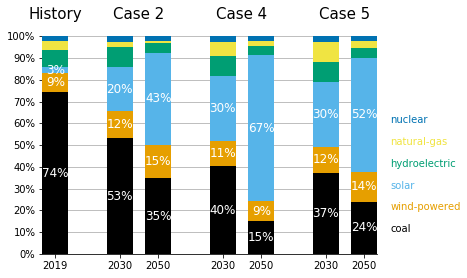

In [6]:
#Using example 1, give the parameter L_ area，tick_ X_ labels，index_ L and data set DA1
fig, ax = plt.subplots()
A=myplt_per_bar(l_area,tick_x_labels,index_l,da1)
A.draw(ax)

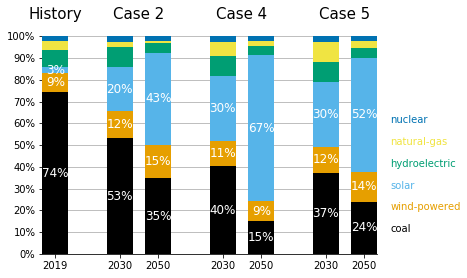

In [7]:
fig

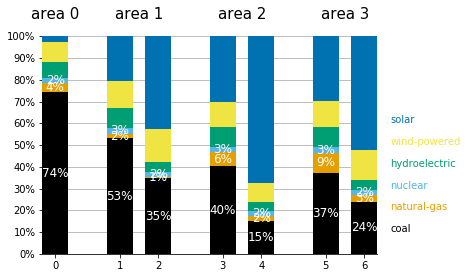

In [8]:
#if no index_l,it will the same as the list of dataframe.columns.the percentage show the first three columns.
#The same, if no tick_x_labels or l_area, they will be repleaced by the order number.
#Using example 2, only the data set DA1, l is given_ Area and ick_ X_ Labels default to count, index_ L is the DA1 parameter by default
B=myplt_per_bar(da1=da1)
B.draw(ax)
fig

In [9]:
l_data=[list(da1.iloc[i]) for i in range(da1.shape[0])]
print(l_data)

[[1202.47838929638, 68.3794501564141, 36.0596289601666, 122.993792546825, 143.490976727858, 45.5445178119581], [1391.29691184031, 56.5178953830077, 69.3365081356358, 240.856910285749, 327.241013945094, 537.34652495941], [2234.79621400229, 39.3928419807386, 150.847486763315, 288.810468405014, 991.184666085355, 2738.93445955753], [1090.17243051643, 173.307464595739, 69.3365081356358, 247.35717384274, 310.655128025275, 812.446610481072], [1038.71806139079, 141.706343699217, 150.847486763315, 295.368439381702, 596.827752551902, 4573.83447804137], [990.755797416134, 245.359108606832, 69.3365081356358, 249.04856498694, 320.252230566241, 788.163285095816], [1593.18275685906, 216.000300549826, 150.847486763315, 294.993631123935, 920.978671091632, 3471.5235574425]]


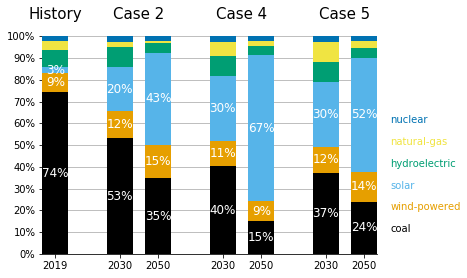

In [10]:
#Using example 3, give the list dataset L_ Data, parameter L_ area,tick_ X_ Labels and index_ l. And L_ data_ Index (this is L_ Column label parameter of data)
C=myplt_per_bar(l_area,tick_x_labels,index_l,l_data=l_data,l_data_index=l_data_index)
C.draw(ax)
fig

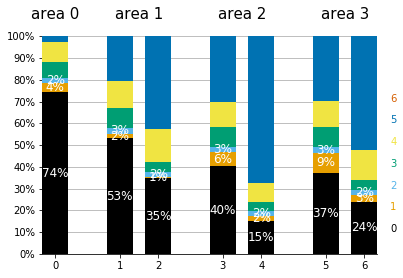

In [11]:
#Using example 4, only the parameter L is given_ Data, the other parameters are l by default_ Count of data
D=myplt_per_bar(l_data=l_data)
D.draw(ax)
fig

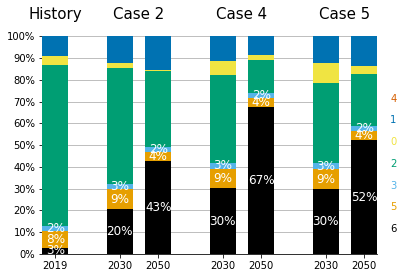

In [12]:
#Using example 5, give the parameter index_ l. The number is L_ Column parameter sorting of data
E=myplt_per_bar(l_area,tick_x_labels,index_l=[6,5,3,2,0,1,4],l_data=l_data)
E.draw(ax)
fig

In [13]:
import matplotlib
import matplotlib.pyplot as plt

In [14]:
color_grew=(230,230,230)

In [17]:
da1 #pandas.dataframe data set
l_area=["History","Case 2","Case 4","Case 5"] #area name
tick_x_labels=["2019","2030","2050","2030","2050","2030","2050"] #Data labels per column
index_l=["coal","wind-powered","solar","hydroelectric","natural-gas","nuclear"] #The results are sorted by this label from bottom to top
l_data_index=list(da1.columns) #If list is the data column of the input data set

In [18]:
l_data_index

['coal', 'natural-gas', 'nuclear', 'hydroelectric', 'wind-powered', 'solar']

In [19]:
index_l

['coal', 'wind-powered', 'solar', 'hydroelectric', 'natural-gas', 'nuclear']

In [20]:
Out=[]
for i in l_data:
    h_l=i
    h_sum=sum(h_l)
    out_l=[(int(round(h_l[i]/h_sum,2)*100),l_data_index[i]) for i in range(len(h_l))]
    Out_l2=[]
    for index in index_l:
        for out in out_l:
            if index==out[1]:
                Out_l2.append(out)
                break
    Out_l2=[(i[1],i[0]) for i in Out_l2]
    Out.append(Out_l2)
Out

[[('coal', 74),
  ('wind-powered', 9),
  ('solar', 3),
  ('hydroelectric', 8),
  ('natural-gas', 4),
  ('nuclear', 2)],
 [('coal', 53),
  ('wind-powered', 12),
  ('solar', 20),
  ('hydroelectric', 9),
  ('natural-gas', 2),
  ('nuclear', 3)],
 [('coal', 35),
  ('wind-powered', 15),
  ('solar', 43),
  ('hydroelectric', 4),
  ('natural-gas', 1),
  ('nuclear', 2)],
 [('coal', 40),
  ('wind-powered', 11),
  ('solar', 30),
  ('hydroelectric', 9),
  ('natural-gas', 6),
  ('nuclear', 3)],
 [('coal', 15),
  ('wind-powered', 9),
  ('solar', 67),
  ('hydroelectric', 4),
  ('natural-gas', 2),
  ('nuclear', 2)],
 [('coal', 37),
  ('wind-powered', 12),
  ('solar', 30),
  ('hydroelectric', 9),
  ('natural-gas', 9),
  ('nuclear', 3)],
 [('coal', 24),
  ('wind-powered', 14),
  ('solar', 52),
  ('hydroelectric', 4),
  ('natural-gas', 3),
  ('nuclear', 2)]]

In [41]:
rows=tick_x_labels
rows

['2019', '2030', '2050', '2030', '2050', '2030', '2050']

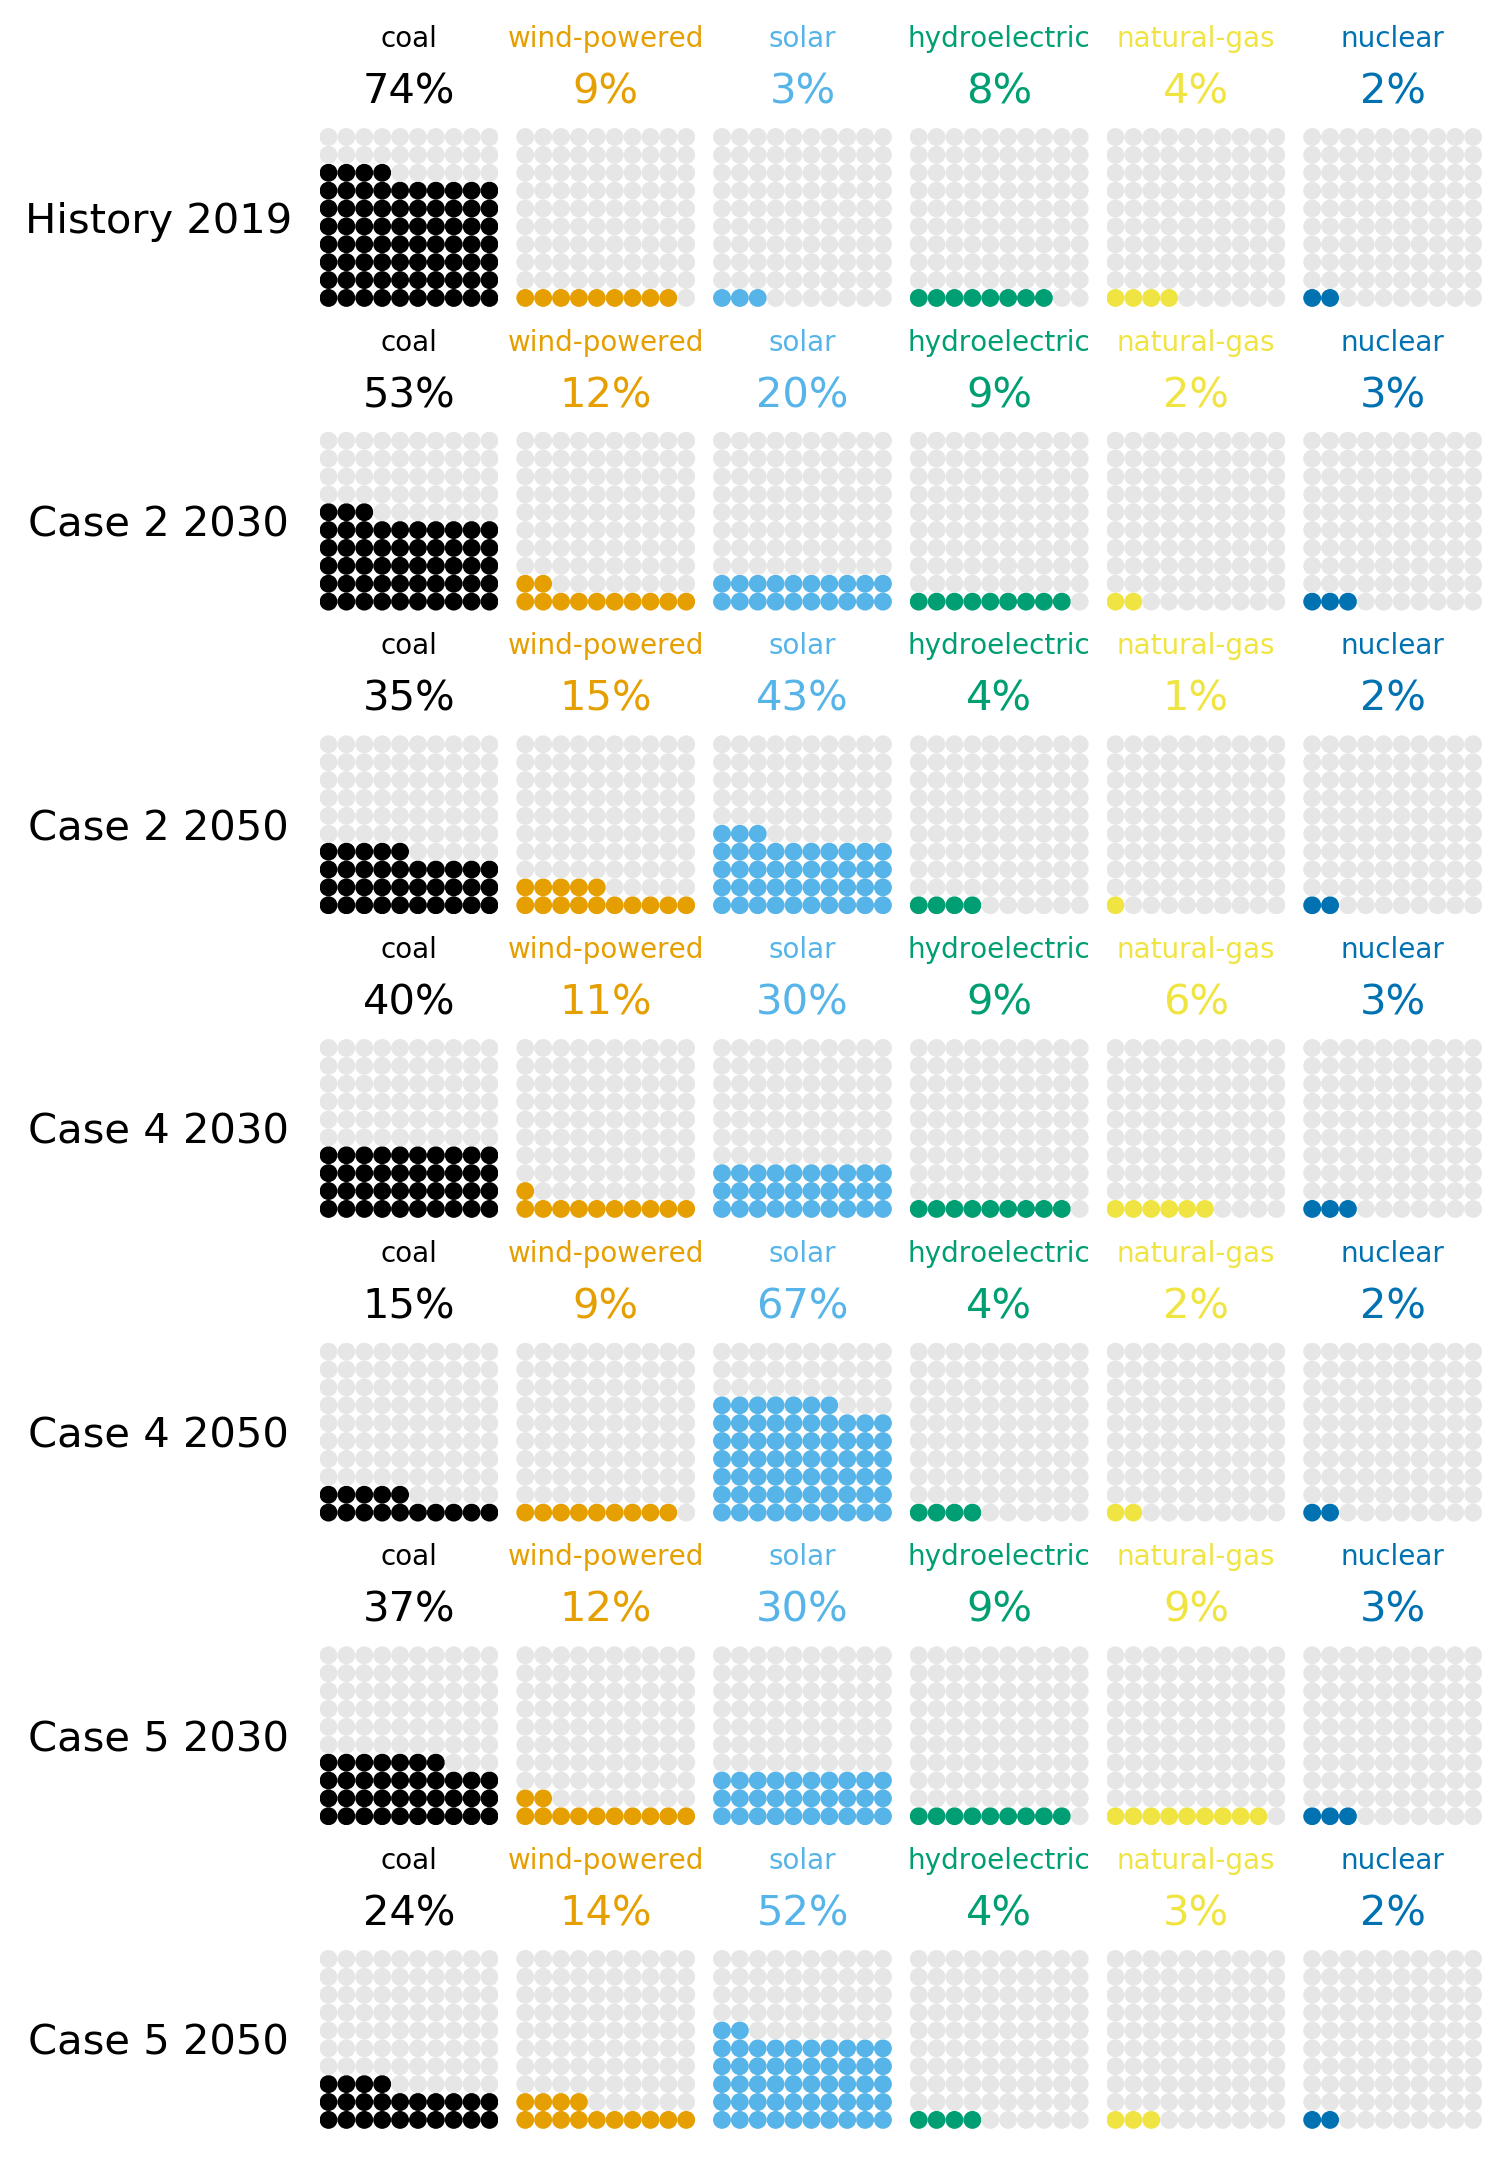

In [40]:
from matplotlib.patches import Circle

data_l=[[j[1] for j in i] for i in Out]

fig,axes = plt.subplots(7,6)
fig.dpi=250
fig.subplots_adjust(left=None, bottom=None, right=None, top=2.2, wspace=0.1)
for i in range(7):
    for j in range(6):
        ax=axes[i,j]
        ax.set_ylim((0,100))
        ax.set_xlim((0,100))
        ax.set_aspect(1)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines['top'].set_color('None')
        ax.spines['right'].set_color('None')
        ax.spines['left'].set_color('None')
        ax.spines['bottom'].set_color('None')
        num=0
        color=color_l[j]
        ax.text(50,120 , str(data_l[i][j])+"%", size = 12, ha='center', va= 'center',color =(color[0]/255,color[1]/255,color[2]/255))
        ax.text(50,150 , str(index_l[j]), size = 8, ha='center', va= 'center',color =(color[0]/255,color[1]/255,color[2]/255))
        for m in range(10):
            for n in range(10):
                num+=1
                if num>data_l[i][j]:
                    color=color_grew
                cir = Circle(xy = (n*10+5, m*10+5), radius=5,facecolor=(color[0]/255,color[1]/255,color[2]/255))
                ax.add_patch(cir)
        if j==0:
            if i==0:
                ax.set_title(l_area[i]+' '+rows[i],x=-0.9,y=0.3)
            elif i%2==0:
                ax.set_title(l_area[int(i/2)]+' '+rows[i],x=-0.9,y=0.3)
            elif i%2==1:
                ax.set_title(l_area[int(i/2)+1]+' '+rows[i],x=-0.9,y=0.3)
            #ax.set_title("title 2",x=-1,y=0.3)
#plt.title("your title name", y=-0.1)
plt.show()